In [35]:
import numpy as np
import pandas as pd

from mplchart.samples import sample_prices   


In [36]:
prices = sample_prices()
prices

,open,high,low,close,volume
date,,,,,
1980-12-12,0.099058,0.099488,0.099058,0.099058,469033600
1980-12-15,0.094321,0.094321,0.093890,0.093890,175884800
1980-12-16,0.087429,0.087429,0.086999,0.086999,105728000
1980-12-17,0.089152,0.089582,0.089152,0.089152,86441600
1980-12-18,0.091736,0.092167,0.091736,0.091736,73449600
...,...,...,...,...,...
2024-05-29,189.610001,192.250000,189.509995,190.289993,53068000
2024-05-30,190.759995,192.179993,190.630005,191.289993,49947900
2024-05-31,191.440002,192.570007,189.910004,192.250000,75158300


In [37]:
def calc_slope(series, period: int = 20):
    """Slope (Linear Regression)"""

    xx = np.arange(period, dtype=float)

    def func(xs):
        if np.any(np.isnan(xs)):
            return np.nan

        return np.polyfit(xx, xs, 1)[0]

    return series.rolling(window=period).apply(func, raw=True)



In [38]:
calc_slope(prices)

,open,high,low,close,volume
date,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-05-29,0.847709,0.854338,0.875072,0.862896,-2.659727e+06
2024-05-30,0.656438,0.690606,0.717531,0.681618,-2.972365e+06
2024-05-31,0.488887,0.514012,0.545066,0.539457,-2.232118e+06


In [ ]:
%timeit calc_slope(prices)

In [33]:
from mplchart.model import Indicator

class SLOPE(Indicator):
    """Slope"""

    def __init__(self, period: int = 20):
        self.period = period

    def __call__(self, prices):
        series = self.get_series(prices)
        return calc_slope(series, period=self.period)


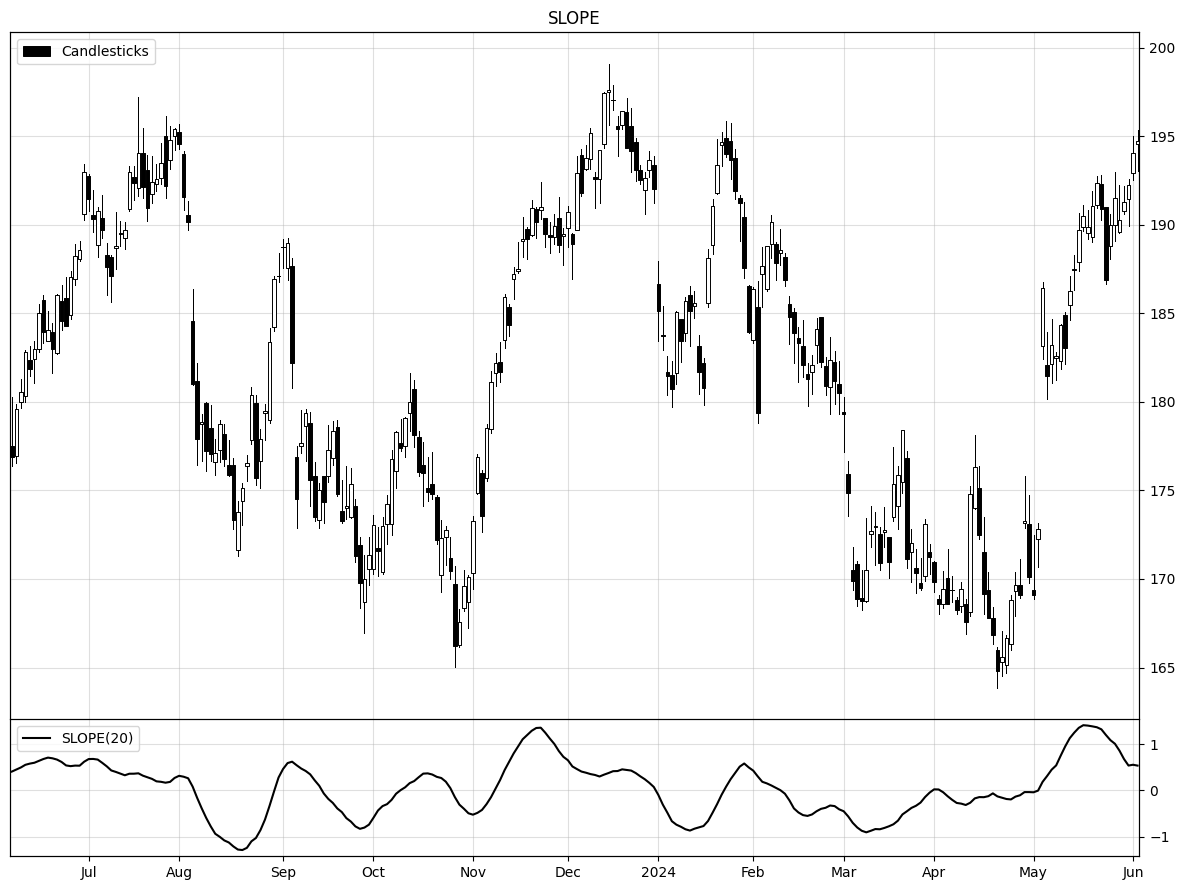

In [34]:
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks

max_bars = 250

indicators = [
    Candlesticks(),
    SLOPE()
]

chart = Chart(title="SLOPE", max_bars=max_bars)
chart.plot(prices, indicators)

True